# Proyecto Final Analítica: Análisis de Datos para pacientes de Parkinson

### Estudiante: Juan Felipe Reyes G
### Código: A00309924

### Profesor: Javier Diaz


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
data_orig = pd.read_csv('dataset_variables_parkinson_marcha_K1_pdg.csv', header = 0, names=None, sep=';', decimal=',')
data_orig.Case1_Control0 = data_orig.Case1_Control0.replace(1, 'Positivo')
data_orig.Case1_Control0 = data_orig.Case1_Control0.replace(0, 'Negativo')

data_orig

,PKID,Case1_Control0,Edad,Genero,GaitAnalysisTestId,Id,JointType,Cycle Number,Cycle Time,Cycle Time Unit,...,Swing Time,Swing Time Unit,Distance,Distance Unit,Duration Time,Duration Time Unit,Speed,Speed Unit,Acceleration,Acceleration Unit
0,PK027,Positivo,79,M,4525c4ba-fd77-4c77-a9a8-bbe08404edd1,cf233379-0572-4f08-98e3-4cd34c71c7e1,AnkleRight,1,0.803979,Seconds (average),...,0.670972,Seconds,1.979175,Meters,2.058999,Seconds,0.961232,Meter/Seconds (m/s),0.466844,Meter/Seconds^2 (m/s^2)
1,PK027,Positivo,79,M,4525c4ba-fd77-4c77-a9a8-bbe08404edd1,db78663b-09b7-4202-9c53-a71f5d935e7a,AnkleLeft,1,0.701892,Seconds (average),...,0.624083,Seconds,1.890646,Meters,1.357033,Seconds,1.393220,Meter/Seconds (m/s),1.026666,Meter/Seconds^2 (m/s^2)
2,PK027,Positivo,79,M,b4f2ed2c-6ffe-488b-b5e1-b9758031d5a9,a17c22de-87f3-4ecc-8461-ed58ee1457fb,AnkleRight,1,0.826989,Seconds (average),...,0.704229,Seconds,1.948560,Meters,2.092554,Seconds,0.931188,Meter/Seconds (m/s),0.445001,Meter/Seconds^2 (m/s^2)
3,PK027,Positivo,79,M,b4f2ed2c-6ffe-488b-b5e1-b9758031d5a9,a19237ea-3b4f-41e4-89dc-473547b1c31f,AnkleLeft,1,0.842031,Seconds (average),...,0.858070,Seconds,1.923441,Meters,2.028073,Seconds,0.948408,Meter/Seconds (m/s),0.467640,Meter/Seconds^2 (m/s^2)
4,PK027,Positivo,79,M,e3db2b5d-1e8d-4b13-b09d-a67b0003bfd8,508fe73d-a0a9-4014-bc47-028d40086cba,AnkleRight,1,0.789131,Seconds (average),...,0.718242,Seconds,1.759962,Meters,1.996203,Seconds,0.881655,Meter/Seconds (m/s),0.441666,Meter/Seconds^2 (m/s^2)
5,PK027,Positivo,79,M,e3db2b5d-1e8d-4b13-b09d-a67b0003bfd8,d2cd4af5-182a-4c0a-a0fe-90f814af1491,AnkleLeft,1,0.795529,Seconds (average),...,0.811643,Seconds,1.974094,Meters,2.121983,Seconds,0.930306,Meter/Seconds (m/s),0.438414,Meter/Seconds^2 (m/s^2)
6,PK015,Positivo,68,M,074b8245-0d88-4050-b5e8-3ab1b8b9f1c4,e4d1a63a-845c-41a9-8497-61fd4c3ba2b4,AnkleRight,1,1.193026,Seconds (average),...,0.953771,Seconds,1.922531,Meters,2.354978,Seconds,0.816369,Meter/Seconds (m/s),0.346657,Meter/Seconds^2 (m/s^2)
7,PK015,Positivo,68,M,074b8245-0d88-4050-b5e8-3ab1b8b9f1c4,c8e5ff5e-a684-4f5e-9647-af8953685d96,AnkleLeft,1,0.488694,Seconds (average),...,0.871583,Seconds,1.951583,Meters,2.355888,Seconds,0.828385,Meter/Seconds (m/s),0.351623,Meter/Seconds^2 (m/s^2)
8,PK015,Positivo,68,M,2b113a30-34ef-4c94-b17b-0cd78e7d3195,cdc4d546-affd-4eb4-9b48-fe22d4deb862,AnkleRight,1,1.045567,Seconds (average),...,0.892023,Seconds,1.972823,Meters,2.090137,Seconds,0.943872,Meter/Seconds (m/s),0.451584,Meter/Seconds^2 (m/s^2)
9,PK015,Positivo,68,M,2b113a30-34ef-4c94-b17b-0cd78e7d3195,5177e25a-39df-4dfc-8f25-0ec5fbe791d4,AnkleLeft,1,0.834999,Seconds (average),...,0.716997,Seconds,1.858186,Meters,2.011989,Seconds,0.923557,Meter/Seconds (m/s),0.459027,Meter/Seconds^2 (m/s^2)


## EDA

In [3]:
data_orig.describe(include='all')

,PKID,Case1_Control0,Edad,Genero,GaitAnalysisTestId,Id,JointType,Cycle Number,Cycle Time,Cycle Time Unit,...,Swing Time,Swing Time Unit,Distance,Distance Unit,Duration Time,Duration Time Unit,Speed,Speed Unit,Acceleration,Acceleration Unit
count,396,396,396.000000,396,396,396,396,396.000000,396.000000,396,...,396.000000,396,396.000000,396,396.000000,396,396.000000,396,396.000000,396
unique,67,2,NaN,2,198,396,2,NaN,NaN,1,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1
top,PK065,Negativo,NaN,M,b25f2dbe-8609-4cb5-a945-b2fd03d6a30c,3ff23961-1717-4329-b441-54663e7000ba,AnkleRight,NaN,NaN,Seconds (average),...,NaN,Seconds,NaN,Meters,NaN,Seconds,NaN,Meter/Seconds (m/s),NaN,Meter/Seconds^2 (m/s^2)
freq,6,206,NaN,246,2,1,198,NaN,NaN,396,...,NaN,396,NaN,396,NaN,396,NaN,396,NaN,396
mean,NaN,NaN,66.353535,NaN,NaN,NaN,NaN,1.151515,0.828894,NaN,...,0.955592,NaN,1.917827,NaN,2.417102,NaN,0.903878,NaN,0.468199,NaN
std,NaN,NaN,9.889837,NaN,NaN,NaN,NaN,0.553262,0.232687,NaN,...,0.414512,NaN,0.066272,NaN,1.126328,NaN,0.280004,NaN,0.280871,NaN
min,NaN,NaN,44.000000,NaN,NaN,NaN,NaN,1.000000,0.108028,NaN,...,0.530065,NaN,1.404693,NaN,1.154018,NaN,0.266775,NaN,0.035774,NaN
25%,NaN,NaN,59.000000,NaN,NaN,NaN,NaN,1.000000,0.694336,NaN,...,0.733061,NaN,1.892893,NaN,1.888034,NaN,0.774300,NaN,0.310339,NaN
50%,NaN,NaN,66.000000,NaN,NaN,NaN,NaN,1.000000,0.810769,NaN,...,0.855052,NaN,1.928044,NaN,2.153054,NaN,0.889656,NaN,0.412156,NaN
75%,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,1.000000,0.923322,NaN,...,0.997798,NaN,1.959343,NaN,2.496073,NaN,1.007977,NaN,0.539428,NaN


In [4]:
EP_val = data_orig.Case1_Control0.value_counts()
print(EP_val)
pk_positivo = EP_val[1]/len(data_orig)
pk_negativo = EP_val[0]/len(data_orig)

print("\nPositivos: %0.2f y Negativos: %0.2f" %(pk_positivo, pk_negativo))

Negativo    206
Positivo    190
Name: Case1_Control0, dtype: int64

Positivos: 0.48 y Negativos: 0.52


Al calcular el baseline se puede afirmar con un **52%** que un paciente NO sera diagnosticado con parkinson.

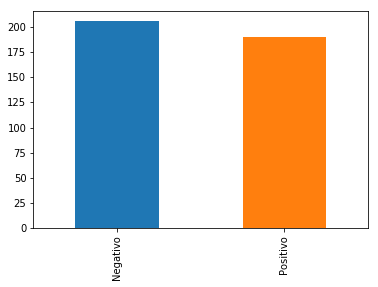

In [5]:
data_orig.Case1_Control0.value_counts().plot.bar()

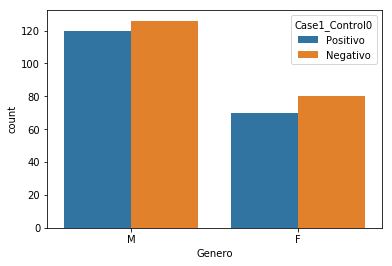

In [6]:
sns.countplot(data=data_orig, hue='Case1_Control0', x='Genero')

Se nota un problema de balanceo de datos para la variable genero, existiendo una mayoria para los hombre en el dataset.

In [7]:
pk_var_num = ['Edad','Cycle Time', 'Stance Percent', 'Stance Time', 'Step Length', 'Step Number',
       'Step Time', 'Step Cadence', 'Stride Number', 'Stride Length',
       'Swing Percent', 'Swing Time', 'Distance', 'Duration Time', 'Speed',
       'Acceleration']

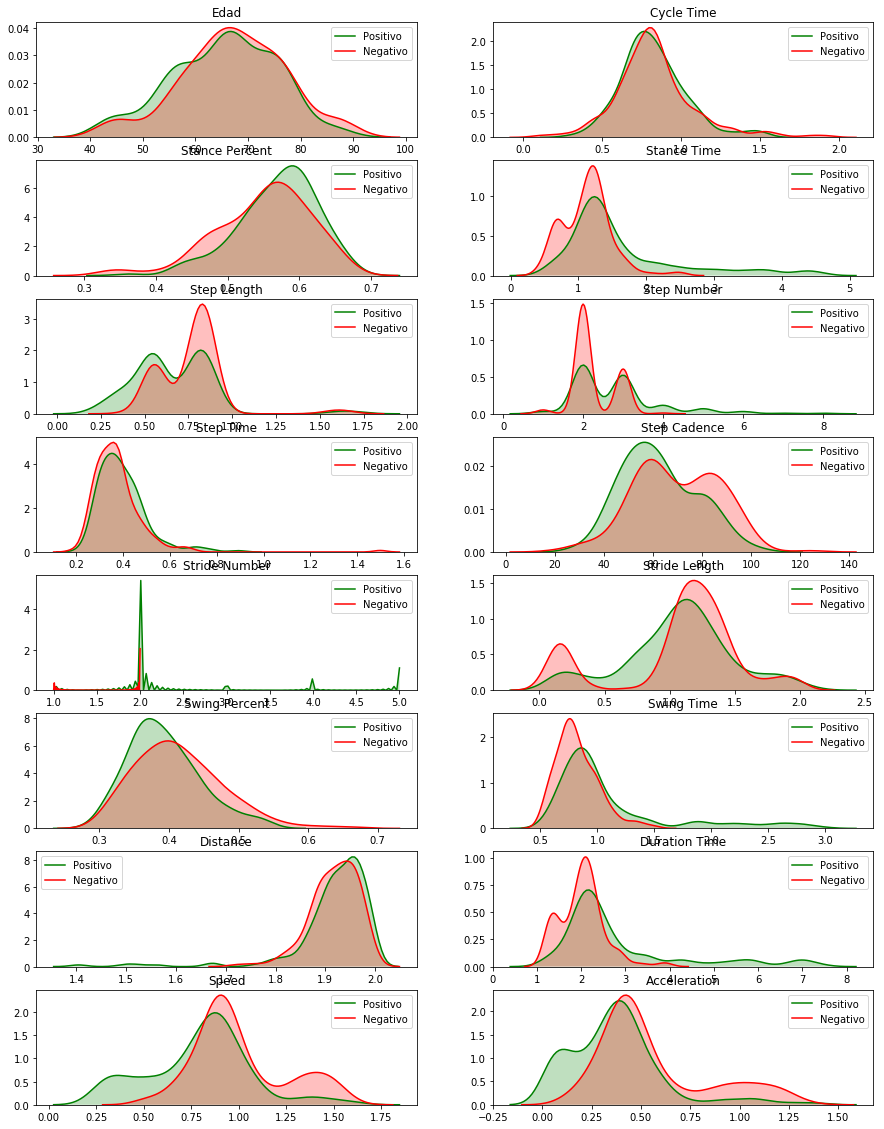

In [8]:
fig = plt.figure(figsize=(15,25))
i = 1
for var_num in pk_var_num:
    ax = fig.add_subplot((len(pk_var_num)/2)+2,2,i)
    sns.kdeplot(data=data_orig[data_orig.Case1_Control0 == 'Positivo'][var_num], shade=True, color='g', ax=ax)
    sns.kdeplot(data=data_orig[data_orig.Case1_Control0 == 'Negativo'][var_num], shade=True, color='r', ax=ax)
    plt.title(var_num)
    plt.legend(['Positivo','Negativo'])
    i+=1

De acuerdo a la graficas se puede intuir visualmente que **la aceleración, la velocidad y la longitud del paso (Stride Lenght)** son las variables que mas discriminan entre el estado del paciente.

In [ ]:
fig = plt.figure(figsize=(15,25))
leng_var_num = len(pk_var_num)
i=0;
for i in range(len(pk_var_num)):
    j=i
    for j in range(i,len(pk_var_num)):
        ax = fig.add_subplot(50,5,j+1)
        sns.scatterplot(x=pk_var_num[i], y=pk_var_num[j], data=data_orig, hue="Case1_Control0", ax=ax)
        

C:\Users\Juan Reyes\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Juan Reyes\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Juan Re

C:\Users\Juan Reyes\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Juan Reyes\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Juan Re

C:\Users\Juan Reyes\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Juan Reyes\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Juan Re

C:\Users\Juan Reyes\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Juan Reyes\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Juan Re

C:\Users\Juan Reyes\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Juan Reyes\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Juan Re

C:\Users\Juan Reyes\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Juan Reyes\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Juan Re

## Reducción de dimensionalidad:

#### Selección de atributos:

Existen varios métodos para la selección de atributos de un dataset:


## Preparación DATASET

In [ ]:
# Separación del dataset para estudiar cada tobilo (Variable categorica)
df_aklr = data_orig[data_orig.JointType=='AnkleRight']
df_akll = data_orig[data_orig.JointType=='AnkleLeft']

print("Número de AnkleRight: %d " % (len(df_aklr)))
print("Número de AnkleLeft: %d " % (len(df_akll)))

In [ ]:
df_knnl = df_akll
df_knnl = df_knnl.astype('float64', errors='ignore')
print(df_knnl.info())



df_knnl_numeric = df_knn._get_numeric_data()
df_knnl_numeric.head()

In [ ]:
df_knnl_numeric.columns